In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
md, lg = 15, 20 
plt.rc('font', size=md)
plt.rc('axes', labelsize=md)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

## Access to water by Indian Schools in different school categories (2013-2016).

In [3]:
water = pd.read_csv('percentage-of-schools-with-water-facility-2013-2016.csv')

In [4]:
water.head()

,State/UT,Year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,98.68,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,98.77,100.00,100.00,100.00,100.00,0.00,0.0,100.0,0.00,99.52
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,100.00
3,Andhra Pradesh,2013-14,86.89,94.53,99.66,90.91,87.26,98.84,96.02,97.5,100.0,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,96.07,100.00,100.00,90.00,99.56,97.48,100.0,100.0,98.37,93.74


In [5]:
water.isna().sum()

State/UT                            0
Year                                0
Primary_Only                        0
Primary_with_U_Primary              0
Primary_with_U_Primary_Sec_HrSec    0
U_Primary_Only                      0
U_Primary_With_Sec_HrSec            0
Primary_with_U_Primary_Sec          0
U_Primary_With_Sec                  0
Sec_Only                            0
Sec_with_HrSec.                     0
HrSec_Only                          0
All Schools                         0
dtype: int64

In [6]:
#import pandas_profiling
#water.profile_report()   #remove hastag to view

In [7]:
water.dtypes

State/UT                             object
Year                                 object
Primary_Only                        float64
Primary_with_U_Primary              float64
Primary_with_U_Primary_Sec_HrSec    float64
U_Primary_Only                      float64
U_Primary_With_Sec_HrSec            float64
Primary_with_U_Primary_Sec          float64
U_Primary_With_Sec                  float64
Sec_Only                            float64
Sec_with_HrSec.                     float64
HrSec_Only                          float64
All Schools                         float64
dtype: object

In [8]:
water_melted = pd.melt(water, id_vars=['State/UT', 'Year'], var_name='Categories', value_name='Values')
water_melted.head()

,State/UT,Year,Categories,Values
0,Andaman & Nicobar Islands,2013-14,Primary_Only,98.17
1,Andaman & Nicobar Islands,2014-15,Primary_Only,99.55
2,Andaman & Nicobar Islands,2015-16,Primary_Only,100.00
3,Andhra Pradesh,2013-14,Primary_Only,86.89
4,Andhra Pradesh,2014-15,Primary_Only,91.85


In [9]:
water_melted['Categories'].unique()

array(['Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'], dtype=object)

In [10]:
school_levels_only = water[['State/UT','Year','Primary_Only', 'U_Primary_Only', 'Sec_Only', 'HrSec_Only', 'All Schools']]
school_levels_only.head()

,State/UT,Year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,0.00,0.0,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,100.00,0.0,0.00,99.52
2,Andaman & Nicobar Islands,2015-16,100.00,0.00,0.0,0.00,100.00
3,Andhra Pradesh,2013-14,86.89,90.91,97.5,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,100.00,100.0,98.37,93.74


### Perform Analysis and Visualization of each academic year using 'All Schools' level

In [11]:
plt.style.use('seaborn')
#sns.set_theme(style="whitegrid")
plt.rc('figure', figsize=(10, 8))  # to make all the graph the same size
size = (24, 12)

#### Which Indian States have access to water in all school levels ?

<AxesSubplot:xlabel='State/UT'>

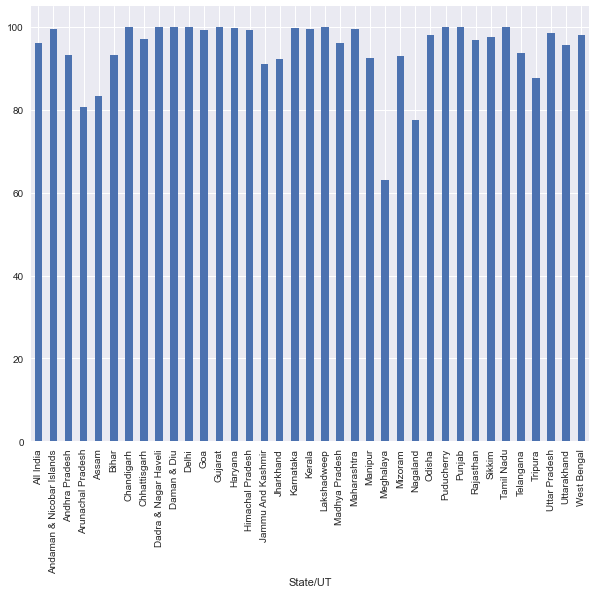

In [12]:
all_schools = school_levels_only.groupby('State/UT')['All Schools'].mean()
all_schools.plot(kind='bar')

All Indian states have more than 60 % access to electricity for all school categories 

A few of these States with 24/7 access to electricity in all school categories

Meghalaya, Nagaland and Arunachal Pradesh have less than 81 % water however 


#### Has there been improvement in access to water from previous academic year to the current academic year in all school levels in India States?

### A) 2013-14_All Schools

In [13]:
year_2013 = school_levels_only[school_levels_only['Year']=='2013-14']
year_2013.head()

,State/UT,Year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,0.00,0.00,0.00,98.69
3,Andhra Pradesh,2013-14,86.89,90.91,97.50,97.52,90.35
6,Arunachal Pradesh,2013-14,72.32,95.35,0.00,100.00,79.79
9,Assam,2013-14,78.32,79.55,88.30,96.22,80.30
12,Bihar,2013-14,87.75,99.28,96.96,97.92,92.53


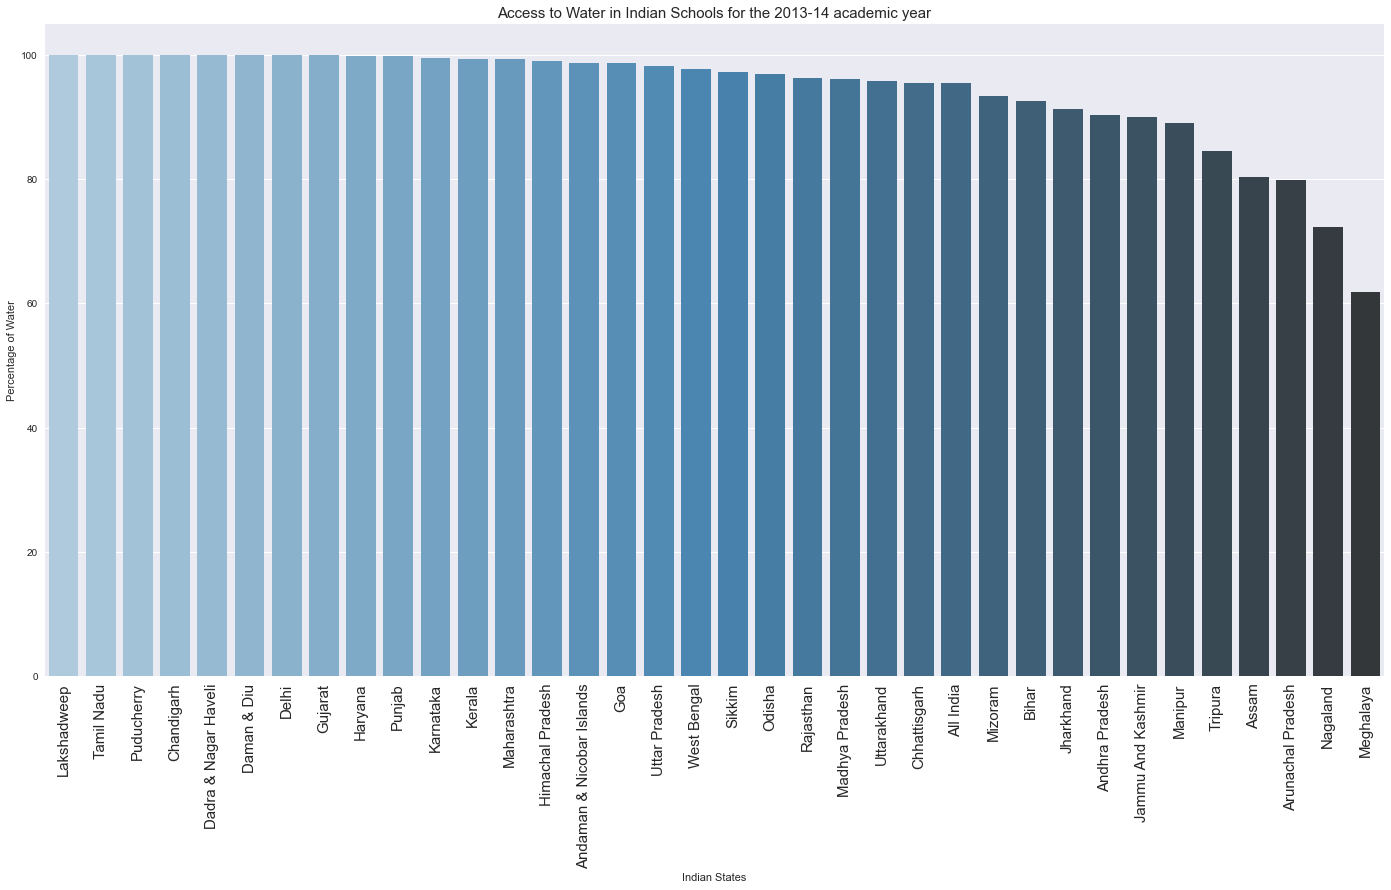

In [14]:
year_2013_sorted = year_2013.set_index('State/UT').sort_values('All Schools', ascending=False)
year_2013_sorted.head()
fig, ax = plt.subplots(figsize=size)
sns.barplot(year_2013_sorted.index, year_2013_sorted['All Schools'],  palette="Blues_d")
plt.xlabel('Indian States')
plt.ylabel('Percentage of Water')
plt.xticks(rotation=90, fontsize=15)
plt.title('Access to Water in Indian Schools for the 2013-14 academic year', fontsize=15)
plt.show()

### 2014-15_All Schools

In [15]:
year_2014 = school_levels_only[school_levels_only['Year']=='2014-15']
year_2014.head()

,State/UT,Year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only,All Schools
1,Andaman & Nicobar Islands,2014-15,99.55,100.00,0.00,0.00,99.52
4,Andhra Pradesh,2014-15,91.85,100.00,100.00,98.37,93.74
7,Arunachal Pradesh,2014-15,73.34,97.56,0.00,0.00,80.64
10,Assam,2014-15,81.76,83.08,86.78,96.92,83.36
13,Bihar,2014-15,87.54,99.25,98.02,96.81,92.74


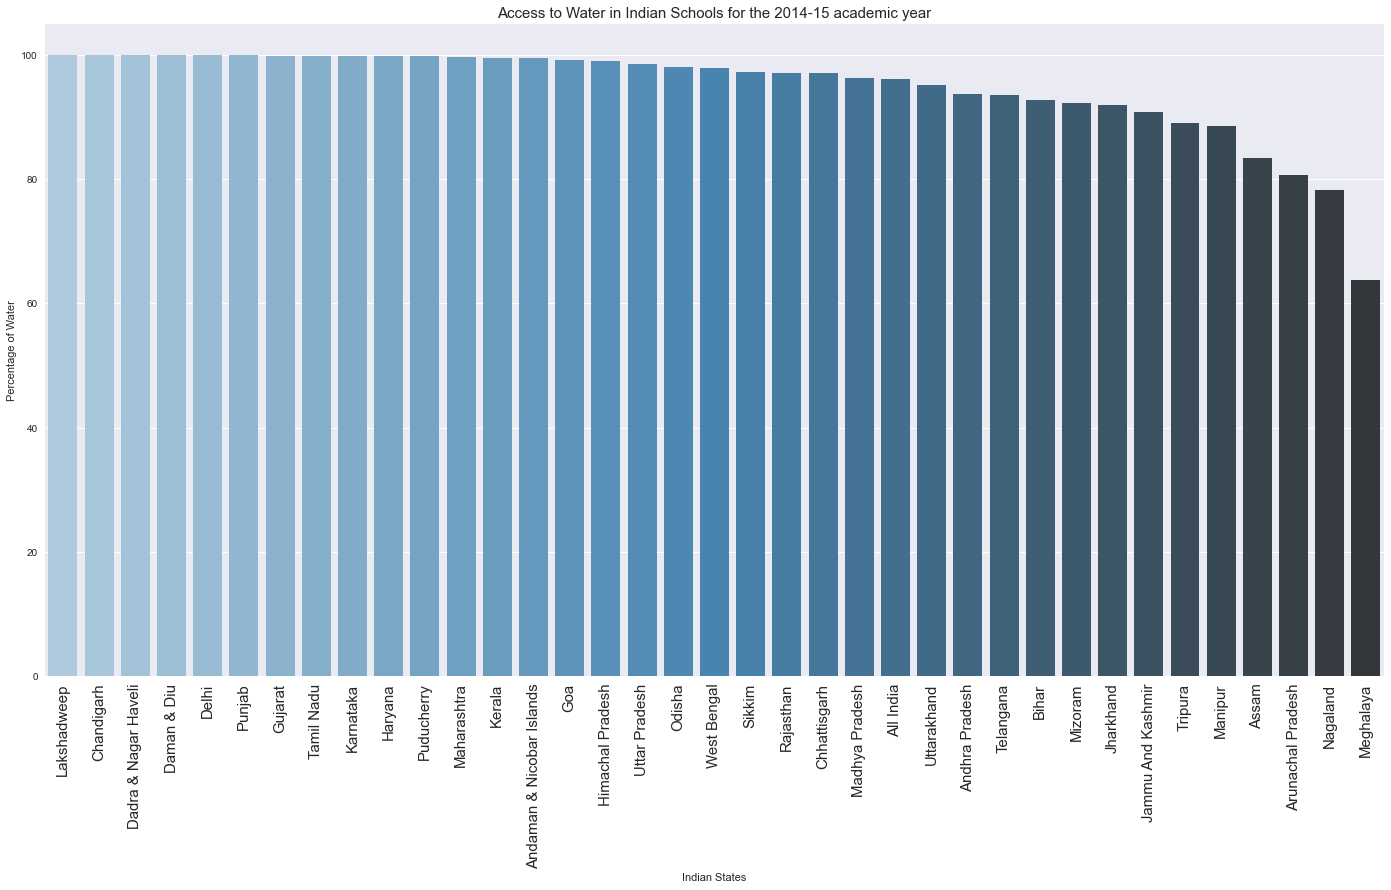

In [16]:
year_2014_sorted = year_2014.set_index('State/UT').sort_values('All Schools', ascending=False)
year_2014_sorted.head()
fig, ax = plt.subplots(figsize=size)
sns.barplot(year_2014_sorted.index, year_2014_sorted['All Schools'], palette="Blues_d")
plt.xlabel('Indian States')
plt.ylabel('Percentage of Water')
plt.xticks(rotation=90, fontsize=15)
plt.title('Access to Water in Indian Schools for the 2014-15 academic year', fontsize=15)
plt.show()

### 2015-16_All Schools

In [17]:
year_2015 = school_levels_only[school_levels_only['Year']=='2015-16']
year_2015.head()

,State/UT,Year,Primary_Only,U_Primary_Only,Sec_Only,HrSec_Only,All Schools
2,Andaman & Nicobar Islands,2015-16,100.00,0.00,0.00,0.00,100.00
5,Andhra Pradesh,2015-16,93.89,100.00,100.00,98.53,95.37
8,Arunachal Pradesh,2015-16,73.85,96.00,0.00,100.00,81.47
11,Assam,2015-16,84.64,86.06,89.62,97.44,86.21
14,Bihar,2015-16,90.31,99.32,98.13,93.72,94.43


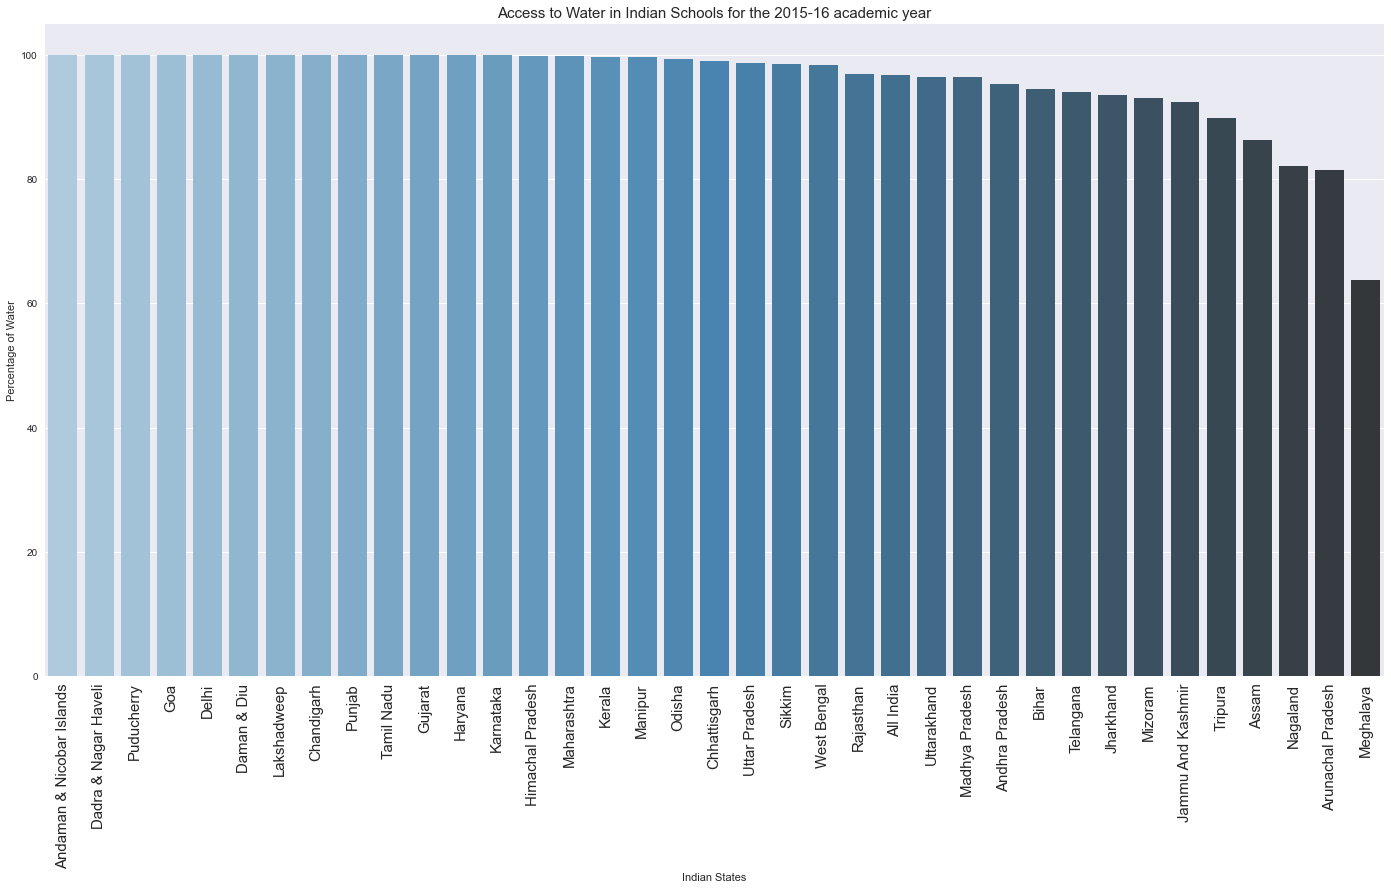

In [18]:
year_2015_sorted = year_2015.set_index('State/UT').sort_values('All Schools', ascending=False)
year_2015_sorted.head()
fig, ax = plt.subplots(figsize=size)
sns.barplot(year_2015_sorted.index, year_2015_sorted['All Schools'], palette="Blues_d")
plt.xlabel('Indian States')
plt.ylabel('Percentage of Water')
plt.xticks(rotation=90, fontsize=15)
plt.title('Access to Water in Indian Schools for the 2015-16 academic year', fontsize=15)
plt.show()

There  have been a really low level of improvement in the access to water in all the school levels in Indian States

Meghalaya, Nagaland and Arunachal Pradesh are still the bottom three showing less than 81 % water supply

Meghalaya however have less than 70 % water supply and we can see there have been little to no improvement in that state within the past three years.

#### Is there improvement in  the supply of water in each school level from one academic session to another academic session in all India States?

In [19]:
all_india = school_levels_only[school_levels_only['State/UT']=='All India']
all_india.head()
all_india_df = pd.melt(all_india, id_vars=['State/UT','Year'], var_name='School_Levels', value_name='Values')
all_india_df.head()
all_india_df = all_india_df.groupby(['Year', 'School_Levels'], as_index=False).sum()
all_india_df.head(10)

,Year,School_Levels,Values
0,2013-14,All Schools,95.40
1,2013-14,HrSec_Only,97.14
2,2013-14,Primary_Only,94.09
3,2013-14,Sec_Only,96.52
4,2013-14,U_Primary_Only,93.90
5,2014-15,All Schools,96.12
6,2014-15,HrSec_Only,98.23
7,2014-15,Primary_Only,94.88
8,2014-15,Sec_Only,96.32
9,2014-15,U_Primary_Only,94.82


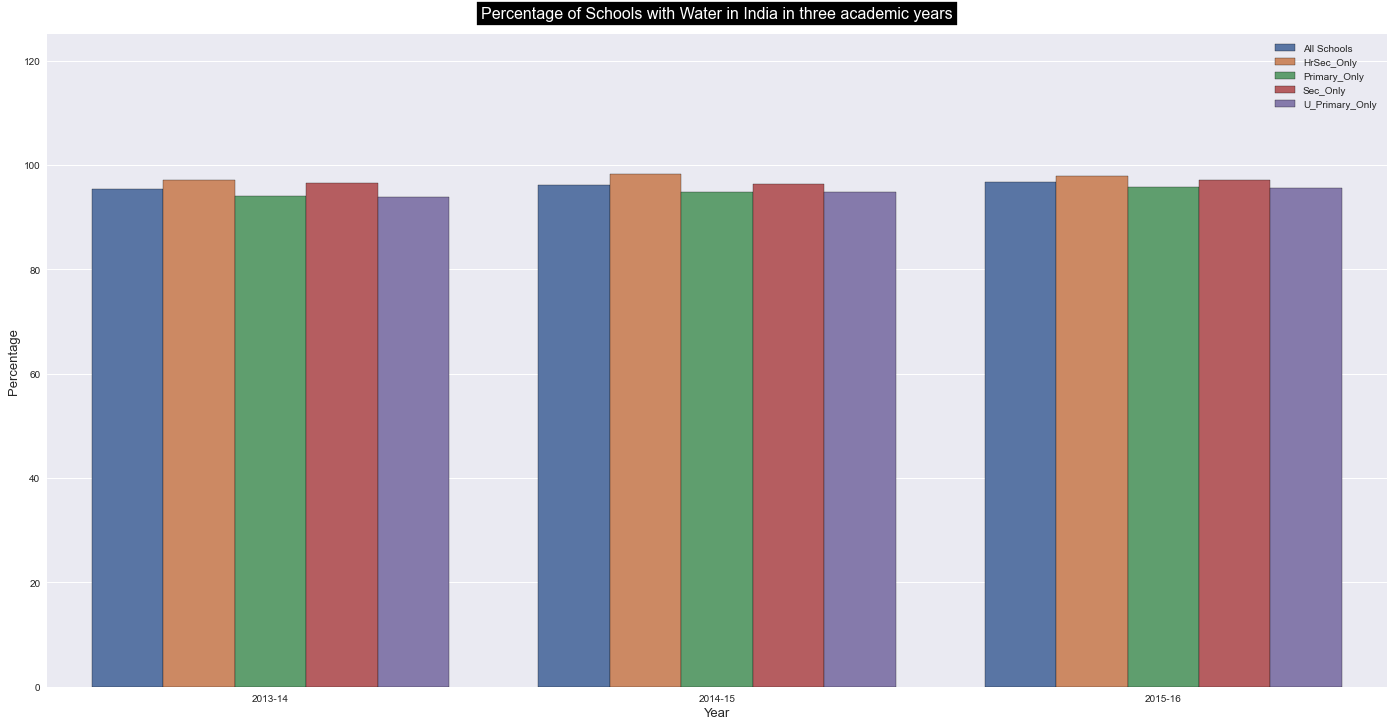

In [20]:
fig, ax = plt.subplots(figsize=size)
bar = sns.barplot(x="Year",y='Values',hue='School_Levels',data=all_india_df ,palette = 'deep',edgecolor='black',ax=ax)
bar.set(ylim=(0, 125))
# highlighting the title
ax.set_title('Percentage of Schools with Water in India in three academic years',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

ax.set_ylabel('Percentage',size=13)
ax.set_xlabel('Year',size=13)

bar.legend(fancybox=True, framealpha=1, borderpad=0.5)

The access to water have been really steady in each of the school categories from one academic session to another academic session.

#### Which India States had a steady supply of water in Primary School Level across all the academic years?

<AxesSubplot:xlabel='State/UT'>

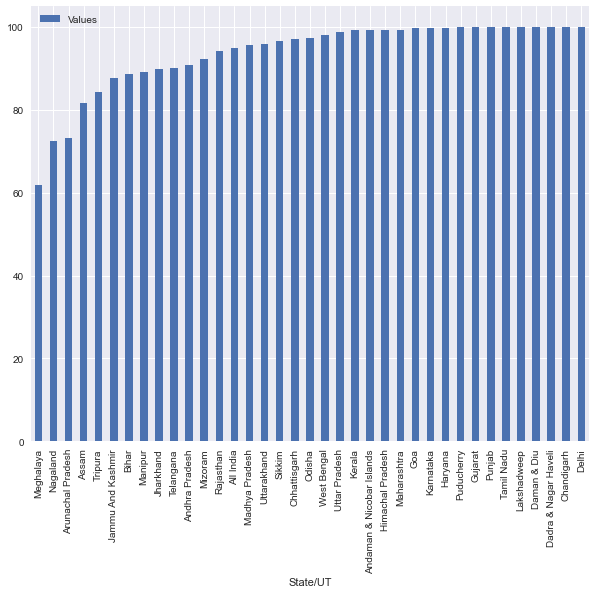

In [21]:
schools_melted = pd.melt(school_levels_only, id_vars=['State/UT','Year'], var_name='School_Levels', value_name='Values')
#schools_melted
primary_schools = schools_melted[schools_melted['School_Levels']=='Primary_Only']
primary_schools = primary_schools.groupby('State/UT', as_index=False).mean()
primary_schools.set_index('State/UT').sort_values('Values').plot(kind='bar')

#### Which India States have a steady supply of water in Upper Primary Schools across the three academic years?

<AxesSubplot:xlabel='State/UT'>

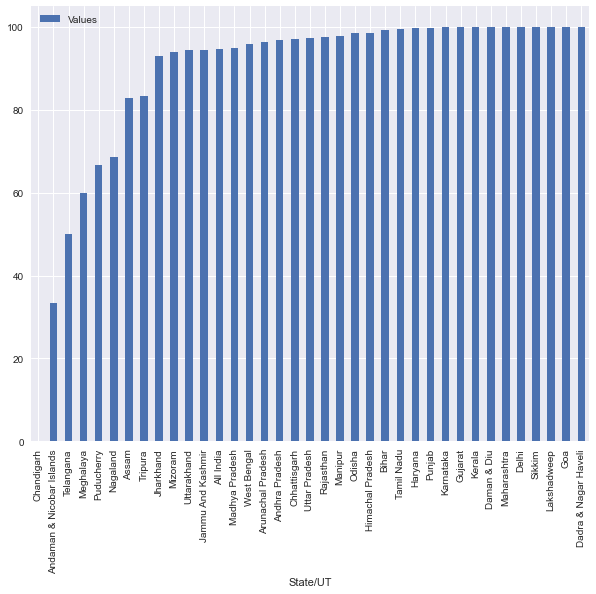

In [22]:
upper_primary_schools = schools_melted[schools_melted['School_Levels']=='U_Primary_Only']
upper_primary_schools = upper_primary_schools.groupby('State/UT', as_index=False).mean()
upper_primary_schools.set_index('State/UT').sort_values('Values').plot(kind='bar')

#### Which India States have a steady supply of water in Secondary Schools across the three academic years?

<AxesSubplot:xlabel='State/UT'>

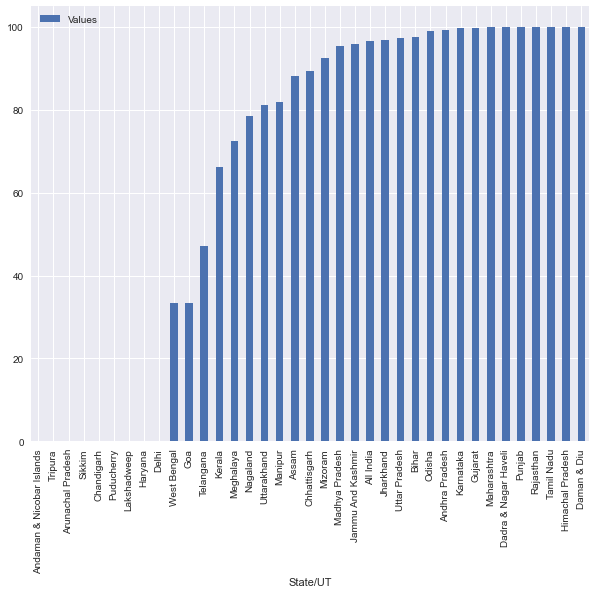

In [23]:
secondary_schools = schools_melted[schools_melted['School_Levels']=='Sec_Only']
secondary_schools = secondary_schools.groupby('State/UT', as_index=False).mean()
secondary_schools.set_index('State/UT').sort_values('Values').plot(kind='bar')

#### Which India States have a steady supply of water in Higher Secondary Schools across the three academic years?

<AxesSubplot:xlabel='State/UT'>

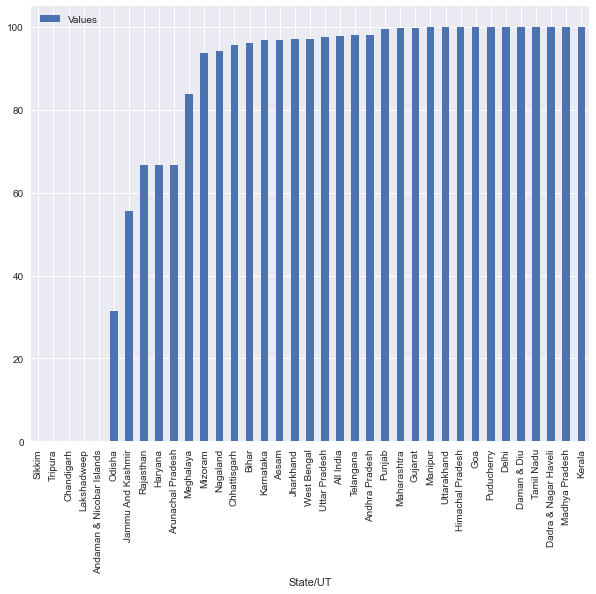

In [24]:
higher_secondary_schools = schools_melted[schools_melted['School_Levels']=='HrSec_Only']
higher_secondary_schools = higher_secondary_schools.groupby('State/UT', as_index=False).mean()
higher_secondary_schools.set_index('State/UT').sort_values('Values').plot(kind='bar')

##### Summary:
- There have been little to no improvement in the water supply for each School Level in all Indian States from one academic session to another.
- Some India States have access to water in one school level eg. hrsecondary and not in anoher eg. primary and via versa
this should be looked into 
